In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("9683.csv")
df

,t,Ax,Ay,Bx,By
0,0.000000,329.3179,-61.94881,404.1580,-133.03530
1,0.004696,329.4612,-61.85218,404.2205,-132.89230
2,0.009393,329.5278,-61.76446,404.1926,-132.84040
3,0.014089,329.6122,-61.54738,404.2671,-132.76420
4,0.018786,329.6676,-60.07535,404.2708,-131.50150
...,...,...,...,...,...
125,0.587048,-756.6727,93.67218,-856.3259,123.46490
126,0.591744,-774.7136,76.36980,-873.0507,109.82480
127,0.596441,-792.0143,58.65655,-889.3876,94.62582
128,0.601137,-809.6449,40.46543,-906.0766,78.62682


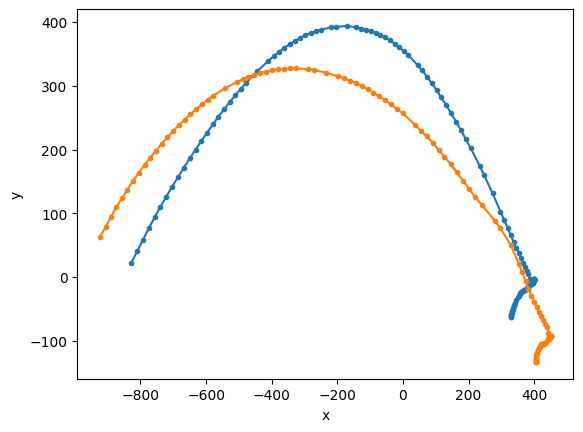

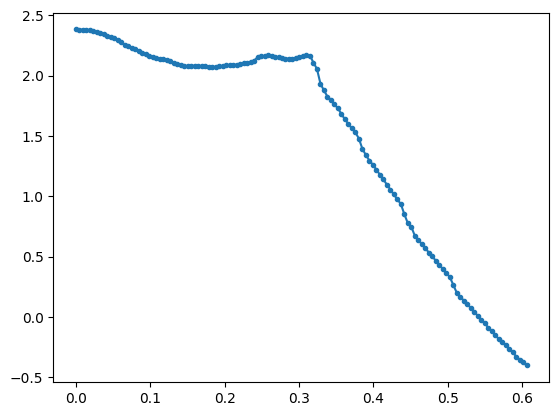

In [12]:
plt.figure()
plt.plot(df['Ax'], df['Ay'], marker='.')
plt.plot(df['Bx'], df['By'], marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure()
plt.plot(df['t'], np.arctan2(df['Ay']-df['By'], df['Ax']-df['Bx']), marker='.')